In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys 
path="../"
sys.path.append(path)
import main as ST

path="../../"
sys.path.append(path)
from custom_tools import plot_one_pulse, get_mids_from_edges, get_T_in_log10_Kelvin

phase_mids=get_mids_from_edges(ST.data.phases)
channel_mids=get_mids_from_edges(ST.NICER.channel_edges)


/=============================================\
| X-PSI: X-ray Pulse Simulation and Inference |
|---------------------------------------------|
|                Version: 2.0.0               |
|---------------------------------------------|
|      https://xpsi-group.github.io/xpsi      |
\=============================================/

Imported GetDist version: 1.4
Imported nestcheck version: 0.2.1
E: failed to import some OS environment variables, using defaults.
machine:  local
num_energies:  40
num_leaves:  30
sqrt_num_cells:  50
integrator: azimuthal_invariance
interpolator: split
Rank reporting: 0
Setting channels for event data...
Channels set.
Setting channels for loaded instrument response (sub)matrix...
Channels set.
No parameters supplied... empty subspace created.
Creating parameter:
    > Named "frequency" with fixed value 4.010e+02.
    > Spin frequency [Hz].
Creating parameter:
    > Named "mass" with bounds [1.000e+00, 3.000e+00].
    > Gravitational mass [solar masses].


# likelihood original vector

(<Figure size 500x300 with 2 Axes>,
 <AxesSubplot: xlabel='Phase', ylabel='Energy (keV)'>)

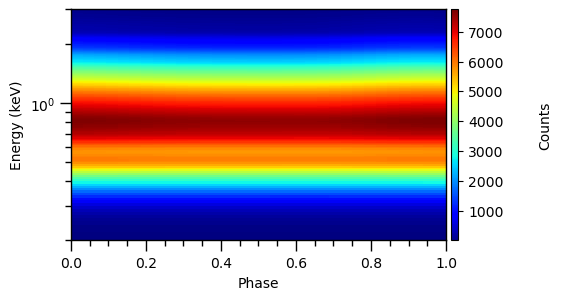

In [2]:
counts_true = ST.signal.expected_counts
plot_one_pulse(counts_true, ST.data.phases, ST.NICER.channel_edges)

(<Figure size 500x300 with 2 Axes>,
 <AxesSubplot: xlabel='Phase', ylabel='Energy (keV)'>)

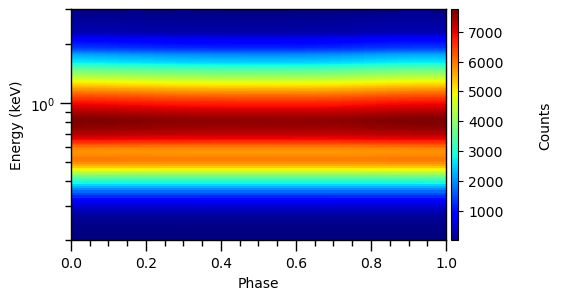

In [3]:
plot_one_pulse(ST.data.counts, ST.data.phases, ST.NICER.channel_edges)

summed difference:  716.5557659740008


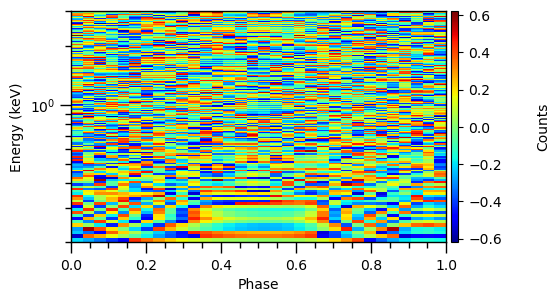

In [4]:
diff_true = counts_true-ST.data.counts


plot_one_pulse(diff_true, ST.data.phases, ST.NICER.channel_edges)

print('summed difference: ',np.sum((diff_true)**2))

(<Figure size 500x300 with 2 Axes>,
 <AxesSubplot: xlabel='Phase', ylabel='Energy (keV)'>)

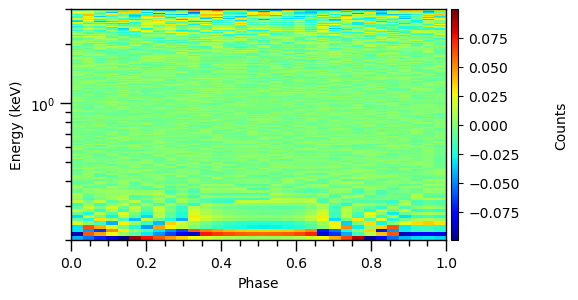

In [5]:
norm_true = diff_true/np.sqrt(ST.data.counts)
plot_one_pulse(norm_true, ST.data.phases, ST.NICER.channel_edges)

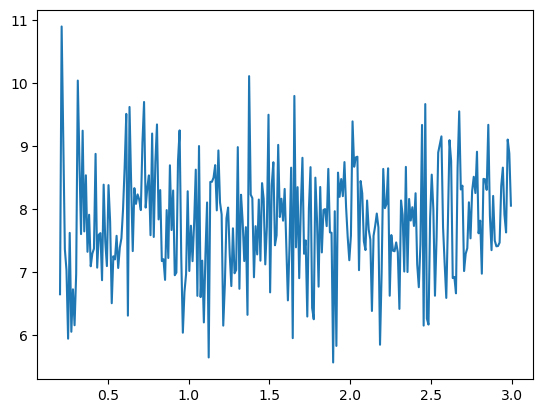

In [6]:
fig, ax = plt.subplots()
ax.plot(channel_mids,np.sum(abs(diff_true),axis=1), label='true')

[]

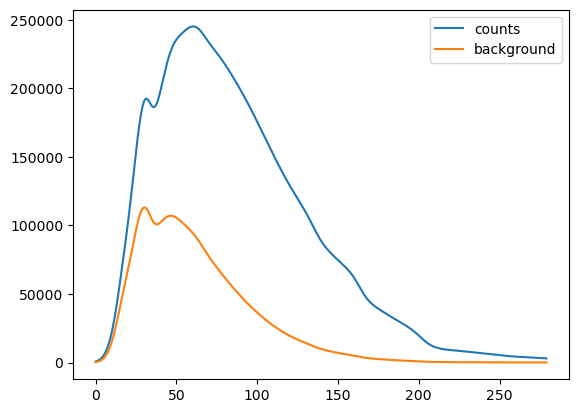

In [7]:
fig, ax = plt.subplots()
summed_counts_o = np.sum(ST.signal.expected_counts, axis =1) 
true_background = ST.signal.background_signal
ax.plot(summed_counts_o, label='counts')
ax.plot(true_background, label='background')
ax.legend()
ax.plot()

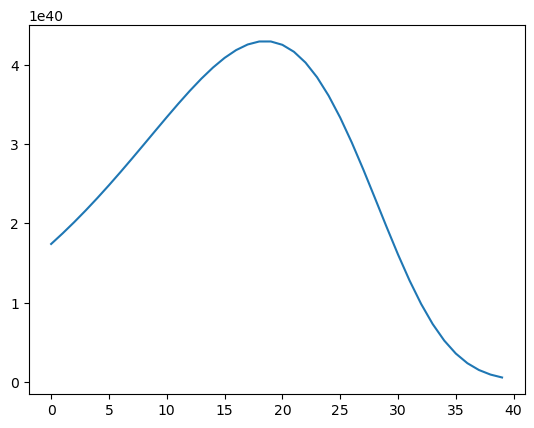

In [8]:
plt.plot(np.sum(ST.photosphere.signal[0][0],axis=1))

# Maximum likelihood 192 lp job

summed difference:  24428.243656314393


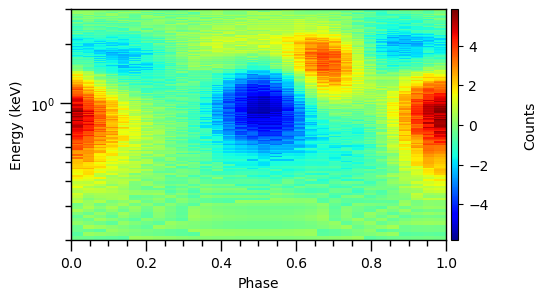

In [9]:
# P_MaxL_192 = [0.166089488067012603E+01,
# 0.880002192119270887E+01,
# 0.346449329423984453E+01,
# 0.146451450087112731E-01,
# -0.824004344790990606E-02,
# 0.113710559990825955E+01,
# 0.334581240206683672E+00,
# 0.147006720245396834E-02,
# 0.738928142100897958E+02,
# 0.119092736886722195E+01,
# 0.670045739653590822E+01,
# 0.121213084628677747E+01]

P_MaxL_NP_192 = [0.159541871493433973E+01,
0.103217607341850268E+02,
0.348596939961232444E+01,
0.546166856071860551E+00,
-0.528761454159420996E-02,
0.105021979369667684E+01,
0.313327751326617054E+00,
0.129295039715317858E-02,
0.415074685360910678E+02,
0.153428372501099131E+01,
0.666247831762742670E+01,
0.100173397883003434E+01]

ST.likelihood(P_MaxL_NP_192, reinitialise=True)

counts_maxl = ST.signal.expected_counts
diff_maxl = counts_maxl-ST.data.counts
plot_one_pulse(diff_maxl, ST.data.phases, ST.NICER.channel_edges)

print('summed difference: ',np.sum((diff_maxl)**2))

(<Figure size 500x300 with 2 Axes>,
 <AxesSubplot: xlabel='Phase', ylabel='Energy (keV)'>)

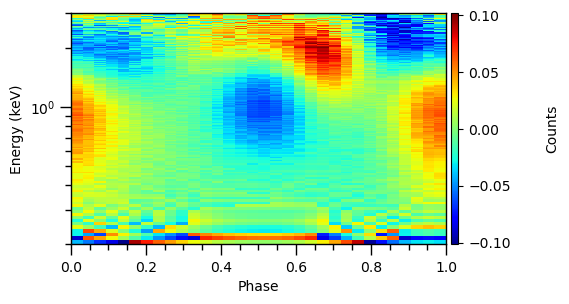

In [10]:
norm_maxl = diff_maxl/np.sqrt(ST.data.counts)
plot_one_pulse(norm_maxl, ST.data.phases, ST.NICER.channel_edges)
# residual between maxl and data normalised over data counts

[]

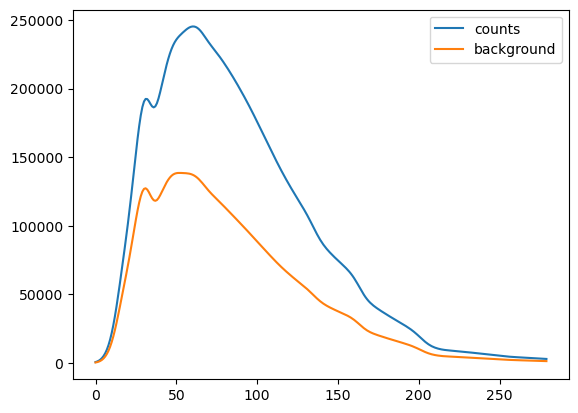

In [11]:
fig, ax = plt.subplots()
summed_counts_maxl = np.sum(ST.signal.expected_counts, axis=1) 
lp192_background = ST.signal.background_signal
ax.plot(summed_counts_maxl, label='counts')
ax.plot(lp192_background, label='background')
ax.legend()
ax.plot()

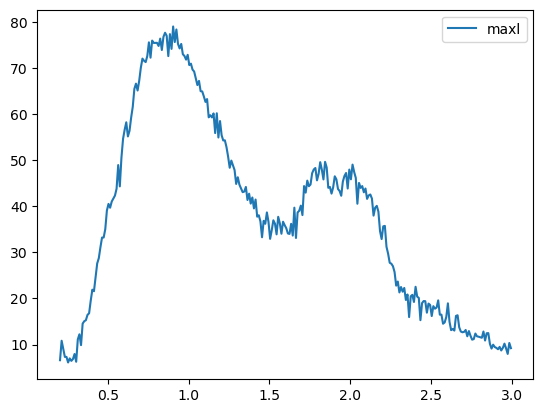

In [12]:
fig,ax = plt.subplots()
ax.plot(channel_mids,np.sum(abs(diff_maxl),axis=1), label='maxl')
ax.legend()

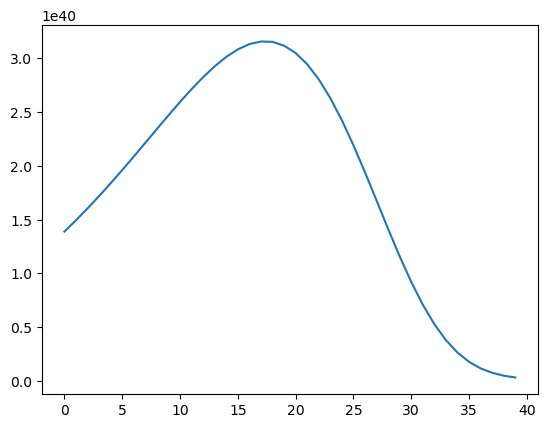

In [13]:
plt.plot(np.sum(ST.photosphere.signal[0][0],axis=1))

# compare original vector vs maxL vector

[]

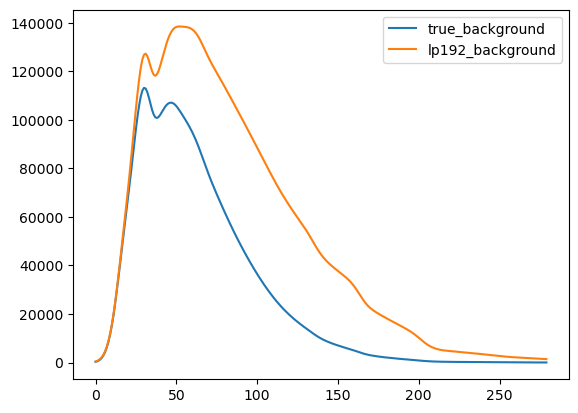

In [14]:
fig, ax = plt.subplots()
ax.plot(true_background, label='true_background')
ax.plot(lp192_background, label='lp192_background')

ax.legend()
ax.plot()

(<Figure size 500x300 with 2 Axes>,
 <AxesSubplot: xlabel='Phase', ylabel='Energy (keV)'>)

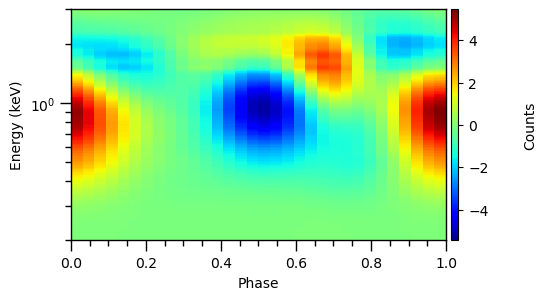

In [15]:
diff_true_maxl = counts_maxl-counts_true
plot_one_pulse(diff_true_maxl, ST.data.phases, ST.NICER.channel_edges)

# residual between counts original vector and maxL vector.

(<Figure size 500x300 with 2 Axes>,
 <AxesSubplot: xlabel='Phase', ylabel='Energy (keV)'>)

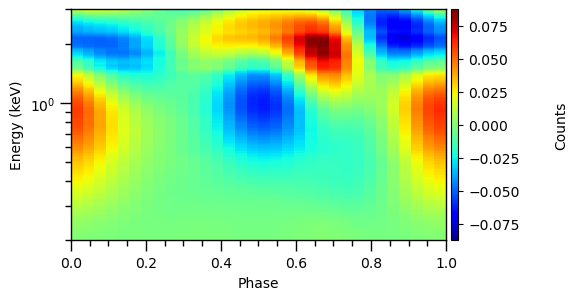

In [16]:
norm_true_maxl = diff_true_maxl/np.sqrt(ST.data.counts)
plot_one_pulse(norm_true_maxl, ST.data.phases, ST.NICER.channel_edges)

# residual between counts original vector and maxL vector but normalised over counts

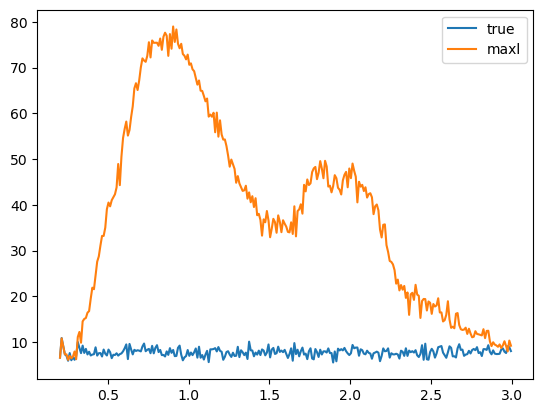

In [17]:
fig,ax = plt.subplots()
ax.plot(channel_mids,np.sum(abs(diff_true),axis=1), label='true')
ax.plot(channel_mids,np.sum(abs(diff_maxl),axis=1), label='maxl')
ax.legend()

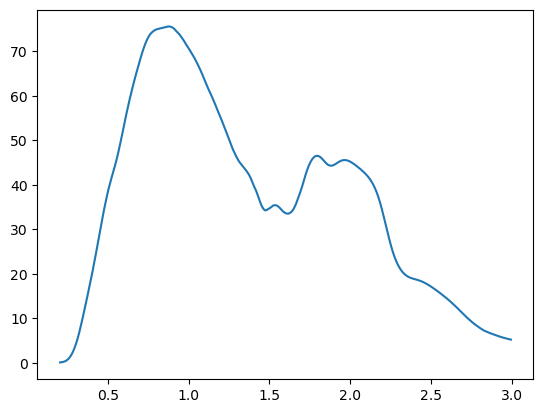

In [18]:
fig, ax = plt.subplots()
diff_true_maxl_summed = np.sum(abs(diff_true_maxl),axis=1)
ax.plot(channel_mids, diff_true_maxl_summed)
# print(diff_true_maxl_summed)

# difference between original vector and max L vector summed

# Maximum likelihood 1000 lp job

P_MaxL_1000 = [0.143487922741846097E+01,
0.105670546531530594E+02,
0.359702712157563642E+01,
0.567626751460999612E+00,
-0.962955296681333728E-03,
0.947700302807278794E+00,
0.333738393572487135E+00,
0.120907353807114988E-02,
0.541298122468860612E+02,
0.134618148088802281E+01,
0.665965052985182204E+01,
0.896414323034762095E+00]

ST.likelihood(P_MaxL_1000, reinitialise=True)

counts_maxl = ST.signal.expected_counts
diff_maxl = counts_maxl-ST.data.counts
plot_one_pulse(diff_maxl, ST.data.phases, ST.NICER.channel_edges)

print('summed difference: ',np.sum((diff_maxl)**2))

norm_maxl = diff_maxl/np.sqrt(ST.data.counts)
plot_one_pulse(norm_maxl, ST.data.phases, ST.NICER.channel_edges)

phase_mids=get_mids_from_edges(ST.data.phases)
channel_mids=get_mids_from_edges(ST.NICER.channel_edges)

fig, ax = plt.subplots()
ax.plot(phase_mids,np.sum(abs(diff_true),axis=0), label='true')
ax.plot(phase_mids,np.sum(abs(diff_maxl),axis=0), label='maxl')
ax.legend()

diff_true_maxl = counts_maxl-counts_true
plot_one_pulse(diff_true_maxl, ST.data.phases, ST.NICER.channel_edges)

norm_true_maxl = diff_true_maxl/np.sqrt(ST.data.counts)
plot_one_pulse(norm_true_maxl, ST.data.phases, ST.NICER.channel_edges)

fig, ax = plt.subplots()
ax.plot(phase_mids,np.sum(diff_true_maxl,axis=0))

# Trying to understand if there is a pattern in the residual

def average_1D(array):
    length = len(array)
    half_length = int(length/2)
    array_averaged = np.empty(half_length)
    for i in range(half_length):
        array_averaged[i] = np.mean((array[2*i],array[2*i+1]))
    return array_averaged

def average_1D_n_times(array, n_times):
    for i in range(n_times):
        array = average_1D(array)
    return array

def average_columns(data):
    averaged_data = np.zeros((int(data.shape[0]/2), data.shape[1]))
    for i in range(data.shape[1]):
        column_averaged = average_1D(data[:,i])
        averaged_data[:,i]= column_averaged
    return averaged_data
 
def average_rows(data):
    averaged_data = np.zeros((data.shape[0], int(data.shape[1]/2)))
    for i in range(data.shape[0]):
        row_averaged = average_1D(data[i,:])
        averaged_data[i,:]= row_averaged
    return averaged_data

def average_data(data, n_times_columns=0, n_times_rows=0):
    for i in range(n_times_columns):
        data = average_columns(data)
    
    for j in range(n_times_rows):
        data = average_rows(data)
    
    return data


column_average_n_times = 5
row_average_n_times = 3
averaged_data = average_data(diff_true, column_average_n_times, row_average_n_times)
averaged_phases = average_1D_n_times(phase_mids, row_average_n_times)
averaged_channels = average_1D_n_times(channel_mids, column_average_n_times)
plot_one_pulse(averaged_data, averaged_phases, averaged_channels)